# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning


In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.
this is my first project coded along with daniel bourke's machine learning course but gives me a much confidence about the regression.

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

The techniques used in here have been inspired and adapted from [the fast.ai machine learning course](https://course18.fast.ai/ml).


## 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:
1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

## 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can [download this file directly from the Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (account required) or view it on Google Sheets.


## Importing the Data and preparing it for modelling

In [1]:
# Importing the required liabraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# reading Data from directory
df = pd.read_csv("data/TrainAndValid.csv",low_memory =False)

In [3]:
# Let's see a sample of our data  
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [4]:
# we've multiple columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


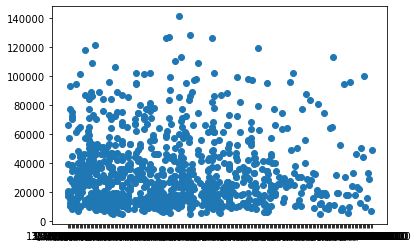

In [5]:
# As we're going to predict price of bulldozer Let's check the relation in Saledate and SalePrice
fig,ax = plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

In [6]:
# there isn't data in sorted format 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

<AxesSubplot:ylabel='Frequency'>

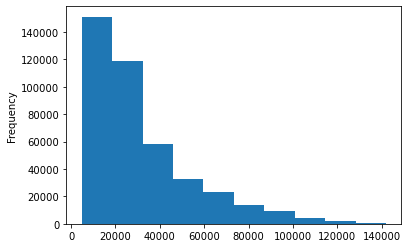

In [7]:
# See the distribution of saleprice
df.SalePrice.plot.hist()

### Parsing dates
When working with time series data, it's a good idea to make sure any date data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).


In [8]:
#reading our data with time series

df = pd.read_csv("data/TrainAndValid.csv",low_memory=False,
                parse_dates=["saledate"])

In [9]:
#with parsedate let's check dtype of saledate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

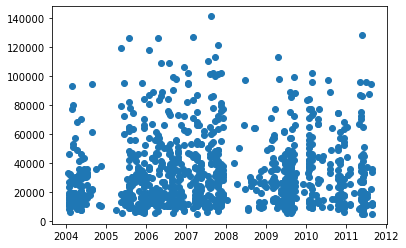

In [10]:
# Now we've saledate dtype in float let's vizualise it

fig,ax = plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [13]:
df.sort_values(by = ["saledate"],ascending=False,inplace=True)

In [14]:
df.saledate.head(20
                )

411423   2012-04-28
409783   2012-04-28
409202   2012-04-28
411522   2012-04-28
409203   2012-04-28
410879   2012-04-28
411465   2012-04-28
408976   2012-04-28
411334   2012-04-28
412164   2012-04-28
411319   2012-04-28
409297   2012-04-28
412218   2012-04-28
409901   2012-04-28
408889   2012-04-28
412476   2012-04-28
409896   2012-04-28
411527   2012-04-28
411599   2012-04-28
411649   2012-04-28
Name: saledate, dtype: datetime64[ns]

### Make a copy of original dataframe

Since we need to manipulate the data we are saing original data and make some changes to temporary data and use it.

In [15]:
df_tmp = df.copy()

In [16]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
411423,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
409783,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409202,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
411522,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409203,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
411423,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
409783,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409202,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
411522,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409203,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Add a Datetime Parameters to the saledate column



In [18]:
# Adding some datetime parameters into saledate in temporary dataframe

df_tmp["SaleYear"] = df_tmp.saledate.dt.year
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleDay"]  = df_tmp.saledate.dt.day
df_tmp["SaleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayofYear"] = df_tmp.saledate.dt.dayofyear

df_tmp.drop("saledate", axis=1, inplace=True)



In [19]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

In [20]:
#let's do some model driven EDA
from sklearn.ensemble import RandomForestRegressor



In [21]:
# we're having missing values with dtype Object

# model = RandomForestRegressor(n_jobs=-1)

# model.fit(df_tmp.drop("SalePrice", axis=1),df_tmp.SalePrice)





In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 411423 to 205615
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [23]:
#Check for Missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Converting Strings to Categories

we've seen dtypes object (which is string)

In [24]:
# convert strings into categories using pandas inbuilt function

pd.api.types.is_string_dtype(df_tmp.Steering_Controls)

True

In [25]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
        

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [26]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [27]:
df_tmp.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 411423 to 205615
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
df_tmp.state.cat.categories


Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_tmp.state.cat.codes


411423     4
409783     4
409202     4
411522     4
409203     4
          ..
92301      8
113547     8
88803      8
142669     8
205615    43
Length: 412698, dtype: int8

In [30]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [31]:
df_tmp.isnull().sum()/len(df_tmp)


SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [32]:
# # Save preprocessed data
# df_tmp.to_csv("./data/train_tm.csv",
#  index=False)


## we just saves our data in case we don't need to preprocess again


In [52]:
# Import preprocessed data
df_tmp = pd.read_csv("./data/train_tm.csv",
 low_memory=False)

In [53]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofWeek,SaleDayofYear
0,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,331,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
1,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,310G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
2,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119
3,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,753,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
4,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119


In [54]:
# Check missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### fill Missing values
From our experience with machine learning models. We know two things:
1. All of our data has to be numerical
2. There can't be any missing values
And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.
Let's ll them.
Filling numerical values rst
We're going to ll any column with missing values with the median of that column.

In [55]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofWeek,SaleDayofYear
0,6309986,16000.0,1899882,9508,149,99.0,2005,NaN,NaN,331,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
1,6286233,24000.0,1932403,4605,149,99.0,2005,NaN,NaN,310G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
2,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119
3,6310488,7000.0,1911585,9550,149,99.0,1000,NaN,NaN,753,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
4,6283635,34000.0,1869284,4701,149,99.0,1000,NaN,NaN,544H,...,NaN,NaN,NaN,Standard,Conventional,2012,4,28,5,119


In [56]:
#Let's check which coplumns has a Neumeric values...

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayofWeek
SaleDayofYear


In [57]:
# We've multiple Neumeric columns so check who has the missing values..

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [58]:
df_tmp.head().T

,0,1,2,3,4
SalesID,6309986,6286233,6283634,6310488,6283635
SalePrice,16000.0,24000.0,35000.0,7000.0,34000.0
MachineID,1899882,1932403,1930870,1911585,1869284
ModelID,9508,4605,4701,9550,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2005,2005,1998,1000,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,331,310G,544H,753,544H


In [59]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())
        

In [60]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofWeek,SaleDayofYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,6309986,16000.0,1899882,9508,149,99.0,2005,0.0,NaN,331,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
1,6286233,24000.0,1932403,4605,149,99.0,2005,0.0,NaN,310G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
2,6283634,35000.0,1930870,4701,149,99.0,1998,0.0,NaN,544H,...,NaN,Standard,Conventional,2012,4,28,5,119,False,True
3,6310488,7000.0,1911585,9550,149,99.0,1000,0.0,NaN,753,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
4,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,NaN,544H,...,NaN,Standard,Conventional,2012,4,28,5,119,False,True


In [61]:
# Check if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [62]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [63]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

# Check if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [64]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [65]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1   

In [66]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [67]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [68]:
df_tmp.head().T

,0,1,2,3,4
SalesID,6309986,6286233,6283634,6310488,6283635
SalePrice,16000.0,24000.0,35000.0,7000.0,34000.0
MachineID,1899882,1932403,1930870,1911585,1869284
ModelID,9508,4605,4701,9550,4701
datasource,149,149,149,149,149
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,False,True,False


In [69]:
# %%time
# # Instantiate model
# model = RandomForestRegressor(n_jobs=-1) 
# # Fit the model
# model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

In [51]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice)

NameError: name 'model' is not defined

## Splitting of data
According to the Kaggle data page, the validation set and test set are split according to dates.
This makes sense since we're working on a time series problem.
E.g. using past events to try and predict future events.
Knowing this, randomly splitting our data into train and test sets using something like
train_test_split() wouldn't work.
Instead, we split our data into training, validation and test sets using the date each sample occured.
In our case:
Training = all samples up until 2011
Valid = all samples form January 1, 2012 - April 30, 2012
Test = all samples from May 1, 2012 - November 2012

In [73]:
# As we got an accuracy about 98% on the data where our model is trained 
# That is why we're going to split our data into training and validation set and further we'll train our model on a subset to work in time..

# we'll split our data using saleyear 

df_tmp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [74]:
#split data based on 2012 year as validation data
val_data = df_tmp[df_tmp.SaleYear ==2012]
train_data = df_tmp[df_tmp.SaleYear !=2012]

### Split data into X & y

In [75]:
X_train,y_train = train_data.drop("SalePrice",axis=1),train_data.SalePrice
X_valid,y_valid = val_data.drop("SalePrice",axis=1),val_data.SalePrice

In [76]:
X_train.shape,y_train.shape

((401125, 102), (401125,))

In [77]:
X_train.head().T

,11573,11574,11575,11576,11577
SalesID,6284109,6295141,6287076,6271271,6296711
MachineID,1846959,1805359,1862704,84382,1918428
ModelID,1907,15972,4640,1636,24719
datasource,149,149,149,149,149
auctioneerID,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,False,True
Blade_Type_is_missing,True,True,True,False,True
Travel_Controls_is_missing,True,True,True,False,True
Differential_Type_is_missing,True,True,True,True,False


In [78]:
y_train

11573     11500.0
11574     21500.0
11575     19000.0
11576     70000.0
11577     27500.0
           ...   
412693    24000.0
412694    11000.0
412695    39000.0
412696    28000.0
412697     9500.0
Name: SalePrice, Length: 401125, dtype: float64

In [79]:
# np.save("Training data ",df_tmp)

### Building an evaluation function
According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is
root mean squared log error (RMSLE).


RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off
by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more
about exact differences.


It's important to understand the evaluation metric you're going for.


Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.


We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is
the same as taking the log of mean squared error (MSE).


We'll also calculate the MAE and R^2 for fun.

In [80]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error



In [81]:
# Define RMSLE function 
def RMSLE(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


In [82]:
# Creating a function to evaluate our model

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Validation MAE" : mean_absolute_error(y_valid,val_preds),
              "Training RMSLE" :RMSLE(y_train,train_preds),
              "Validation RMSLE" : RMSLE(y_valid,val_preds),
              "R^2 Training" : model.score(X_train,y_train),
              "validation R^2" : model.score(X_valid,y_valid)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

Training on whole data takes usually 15-25 minutes based on system capability so we'll train our model on `subset` of our data 

In [64]:
# This takes too long...

# %%time
# # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

Let's alter the number of samples each `n_estimator` in the RandomForestRegressor see's using the
max_samples parameter.


In [60]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
 max_samples=10000)


%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)


show_scores(model)

# Hyperparameter tuning with RandomizedSearchCV 

Train a model with the best parameters

In [83]:
%%time
from sklearn.model_selection import RandomizedSearchCV

Wall time: 0 ns


In [84]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
         "max_depth": [None, 3, 5, 10],
         "min_samples_split": np.arange(2, 20, 2),
         "min_samples_leaf": np.arange(1, 20, 2),
         "max_features": [0.5, 1, "sqrt", "auto"],
         "max_samples": [10000]}


In [85]:
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

In [ ]:
%%time
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


### Most ideal hyperparameters

### Let's  Find out the best parameters from the given range 



rs_model.best_params_

show_scores(rs_model)

### Train our model with best hyperparameter


In [70]:
# %%time
# # Most ideal hyperparameters
# ideal_model = RandomForestRegressor(n_estimators=90,
#                                          min_samples_leaf=1,
#                                          min_samples_split=14,
#                                          max_features=0.5,
#                                          n_jobs=-1,
#                                          max_samples=None)
# ideal_model.fit(X_train, y_train)



show_scores(ideal_model)

In [76]:
# %%time
# # Faster model

# fast_model = RandomForestRegressor(n_estimators=40,
#  min_samples_leaf=3,
#  max_features=0.5,
#  n_jobs=-1)
# fast_model.fit(X_train, y_train)

Wall time: 1min 34s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [71]:
import pickle

In [87]:
# pickle.dump(fast_model,open('D:/New folder\/M.sav', 'wb'))

In [72]:
Fast_model = pickle.load(open("fast_model.sav" , mode='rb'))

In [86]:
show_scores(Fast_model)

{'Training MAE': 2537.5268538113983,
 'Validation MAE': 5929.779923104405,
 'Training RMSLE': 0.1292293206119996,
 'Validation RMSLE': 0.24382127225554046,
 'R^2 Training': 0.9674181301367378,
 'validation R^2': 0.8816529998764309}

# Make predictions on test Data

In [87]:
# import test data 

df_test = pd.read_csv("data/Test.csv",parse_dates=['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [88]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [92]:
## see prediction on test data

# fast_model.predict(df_test)

 Test data format isn't same as our trained data format as we've done so many data columns addition droped some columns 

# Preprocessing test  data

In [93]:
def preprocess_test_data(df):
    #Add our datetime parameters
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonh"] = df.saledate.dt.month
    df["SaleDay"]  = df.saledate.dt.day
    df["SaleDayofWeek"] = df.saledate.dt.dayofweek
    df["SaleDayofYear"] = df.saledate.dt.dayofyear
    
    # drop original saledate column 
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

                 # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df



In [94]:
df_test = preprocess_test_data(df_test)


In [95]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'SaleMonth', 'auctioneerID_is_missing'}

### Match test dataset columns to training dataset

In [96]:

df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


## Making prediction on the test dataset using the best model

In [95]:
# Make predictions on the test dataset using the best model
test_preds = fast_model.predict(df_test)

In [96]:
# test_preds = np.save("Test_preds",test_preds)

In [97]:
set(X_train.columns) - set(df_test.columns)

{'SaleMonth'}

In [98]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
11573,6284109,1846959,1907,149,2.0,1000,0.0,0,1287,375,...,False,False,False,False,False,True,True,True,True,True
11574,6295141,1805359,15972,149,2.0,2005,0.0,0,1516,451,...,False,False,False,False,False,True,True,True,True,True
11575,6287076,1862704,4640,149,2.0,1000,0.0,0,732,242,...,True,True,True,True,True,True,True,True,True,True
11576,6271271,84382,1636,149,2.0,1000,0.0,0,2332,706,...,True,True,True,True,True,False,False,False,True,True
11577,6296711,1918428,24719,149,2.0,1000,0.0,0,802,256,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,1403418,1390168,7110,132,99.0,1986,0.0,0,744,245,...,True,True,True,True,True,True,True,True,True,True
412694,1449754,1486544,3356,132,99.0,1967,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
412695,1394449,1212304,7001,132,99.0,1982,0.0,0,287,102,...,False,False,False,False,False,True,True,True,True,True
412696,1508793,1255973,4138,132,99.0,1973,0.0,0,2347,713,...,True,True,True,True,True,False,False,False,True,True


In [99]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


 ## Feature Importance

In [100]:
# Find feature importance of our best model
Fast_model.feature_importances_


array([3.40310702e-02, 1.93604036e-02, 4.12690109e-02, 1.81224354e-03,
       3.85639161e-03, 2.02611397e-01, 3.29111530e-03, 1.10938898e-03,
       4.55889703e-02, 4.19404965e-02, 6.93113496e-02, 4.37923970e-03,
       2.39367410e-02, 1.52548517e-01, 4.12944078e-02, 7.26137167e-03,
       2.16716669e-03, 2.13379953e-03, 3.55156085e-03, 4.78547604e-02,
       4.67714287e-04, 3.50359664e-04, 8.09435044e-04, 1.74493043e-04,
       1.07350913e-03, 3.11267388e-04, 3.93493334e-03, 6.03593465e-03,
       6.86703956e-04, 4.03497785e-03, 3.90177127e-03, 3.25573050e-03,
       4.40362511e-03, 1.90838060e-03, 2.14794730e-03, 1.60378780e-02,
       1.12522831e-03, 1.07978933e-02, 3.41673675e-03, 2.34326672e-03,
       5.85863597e-04, 8.03744440e-04, 3.21704649e-03, 6.00606188e-04,
       4.95744040e-04, 3.51386876e-04, 2.51698627e-04, 2.92102568e-03,
       1.09192534e-03, 2.84075552e-04, 1.04793671e-04, 7.40149595e-02,
       4.94471760e-03, 7.27166587e-03, 3.65105090e-03, 1.13574281e-02,
      

In [103]:
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
 df = (pd.DataFrame({"features": columns,"feature_importance": importances}).sort_values("feature_importance", ascending=False).reset_index(drop=True))

 sns.barplot(x="feature_importance",y="features",data=df[:n])


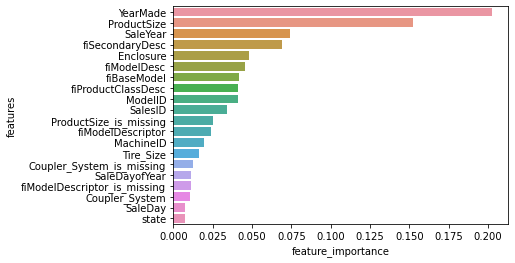

In [105]:
plot_features(X_train.columns, Fast_model.feature_importances_)